In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import linalg as LA
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.style.use('ggplot')

In [41]:
btp_points_faisceaux = pd.read_csv('points_faisceaux/btp_points_faisceaux.csv', skiprows=0, encoding='latin1').fillna(0)
btp_points_faisceaux.drop(["Accl.", "Zone", "Dist. cumul. (m)", "Corhgeo (m)", "Date_Calcul", "Comm", "Type longueur", "Id point ", "Id SU assemb.", "Id slot", "Nom Layout", "Source"], axis=1, inplace=True)
btp_ecarts = pd.read_csv('points_faisceaux/btp_ecarts.csv', skiprows=0, encoding='latin1').fillna(0)
btp_ecarts.drop(["Accl.", "Zone", "Type", "Date R", "Valeur R Bump", "Date V", "Valeur V Bump","Date L", "Valeur L Bump", "Date T", "Valeur T Bump", "Id.", "Dist. Cum. (m)", "Commentaires R", "Commentaires V", "Commentaires L", "Nom Layout", "Inséré Par"], axis=1, inplace=True)

In [43]:
btp_points_faisceaux

Elément       X (m)       Y (m)    Z (m) Longueur (m)  \
0   BTPSTART.0.E  1894.86806  2121.31165  2433.66            -   
1   BTPSTART.0.S  1894.86806  2121.31165  2433.66      0.00000   
2     BTBHZ.10.E  1894.91119  2121.40105  2433.66            -   
3     BTBHZ.10.S  1895.91803  2123.12729  2433.66      2.00046   
4       VVS.10.E  1896.00324  2123.25011  2433.66            -   
..           ...         ...         ...      ...          ...   
57      BPM.60.S  1911.64285  2145.79169  2433.66      0.00000   
58      SMH.42.E  1914.57557  2149.99477  2433.66            -   
59      SMH.42.S  1915.09793  2150.77853  2433.66      0.94200   
60    BTPEND.0.E  1915.11334  2150.80309  2433.66            -   
61    BTPEND.0.S  1915.11334  2150.80309  2433.66      0.00000   

    Tilt faisceau (rad)  1/2 Déflexion (rad)  Gisement (gon)  \
0                   0.0             0.000000       28.614221   
1                   0.0             0.000000       28.614221   
2                   0.0            -0.078545       28.614221   
3                   0.0            -0.078545       38.614852   
4                   0.0             0.000000       38.614852   
..                  ...                  ...             ...   
57                  0.0             0.000000       38.614852   
58                  0.0             0.000000       39.176103   
59                  0.0             0.000000       35.674694   
60                  0.0             0.000000       35.674694   
61                  0.0             0.000000       35.674694   

    Pente faisceau (rad)  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  
..                   ...  
57                   0.0  
58                   0.0  
59                   0.0  
60                   0.0  
61                   0.0  

[62 rows x 9 columns]

In [44]:
btp_ecarts

Elément  Valeur R (m)  Valeur V (m)  Valeur T (rad)  Valeur L (m)
0   BTBHZ.10.E     -0.000017     -0.001810       -0.000284     -0.000753
1   BTBHZ.10.S     -0.000086     -0.001791       -0.000284     -0.000753
2     STP.05.E      0.000070     -0.001805       -0.000184      0.001060
3     STP.05.S      0.000070     -0.001805       -0.000184      0.001060
4     STP.10.E      0.001830     -0.001786       -0.000184      0.000640
5     STP.10.S      0.001830     -0.001786       -0.000184      0.000640
6     BPM.00.E     -0.001293     -0.002308       -0.000054      0.011103
7     BPM.00.S     -0.001293     -0.002308       -0.000054      0.011103
8     QNO.20.E     -0.002196      0.003389        0.000056      0.003136
9     QNO.20.S     -0.002104      0.003249        0.000056      0.003136
10    BPM.10.E     -0.002112      0.002937        0.000026      0.002755
11    BPM.10.S     -0.002112      0.002937        0.000026      0.002755
12    QNO.30.E     -0.002131      0.003199       -0.000004      0.002965
13    QNO.30.S     -0.002077      0.003059       -0.000004      0.002965
14   BPMW.15.E     -0.002252      0.002889        0.000096      0.003029
15   BPMW.15.S     -0.002252      0.002889        0.000096      0.003029
16    QNO.35.E     -0.001958      0.002710       -0.000084      0.002908
17    QNO.35.S     -0.001972      0.002823       -0.000084      0.002908
18    BPM.20.E     -0.002143      0.002669       -0.000014      0.002790
19    BPM.20.S     -0.002143      0.002669       -0.000014      0.002790
20    QNO.50.E     -0.002084      0.002346       -0.000094      0.003078
21    QNO.50.S     -0.002109      0.002235       -0.000094      0.003078
22    BPM.30.E     -0.002162      0.001959        0.000156      0.002991
23    BPM.30.S     -0.002162      0.001959        0.000156      0.002991
24    QNO.55.E     -0.002013      0.002138        0.000066      0.002960
25    QNO.55.S     -0.002026      0.002059        0.000066      0.002960
26    QNO.60.E     -0.002026      0.001793       -0.000054      0.002688
27    QNO.60.S     -0.002010      0.001794       -0.000054      0.002688
28    BPM.60.E     -0.002203      0.001295        0.000046      0.001810
29    BPM.60.S     -0.002203      0.001295        0.000046      0.001810

In [52]:
btp_merged = pd.merge(btp_points_faisceaux, btp_ecarts, on="Elément", how="left")
btp_merged["Gisement (rad)"] = btp_merged["Gisement (gon)"]*np.pi/200
btp_merged

Elément       X (m)       Y (m)    Z (m) Longueur (m)  \
0   BTPSTART.0.E  1894.86806  2121.31165  2433.66            -   
1   BTPSTART.0.S  1894.86806  2121.31165  2433.66      0.00000   
2     BTBHZ.10.E  1894.91119  2121.40105  2433.66            -   
3     BTBHZ.10.S  1895.91803  2123.12729  2433.66      2.00046   
4       VVS.10.E  1896.00324  2123.25011  2433.66            -   
..           ...         ...         ...      ...          ...   
57      BPM.60.S  1911.64285  2145.79169  2433.66      0.00000   
58      SMH.42.E  1914.57557  2149.99477  2433.66            -   
59      SMH.42.S  1915.09793  2150.77853  2433.66      0.94200   
60    BTPEND.0.E  1915.11334  2150.80309  2433.66            -   
61    BTPEND.0.S  1915.11334  2150.80309  2433.66      0.00000   

    Tilt faisceau (rad)  1/2 Déflexion (rad)  Gisement (gon)  \
0                   0.0             0.000000       28.614221   
1                   0.0             0.000000       28.614221   
2                   0.0            -0.078545       28.614221   
3                   0.0            -0.078545       38.614852   
4                   0.0             0.000000       38.614852   
..                  ...                  ...             ...   
57                  0.0             0.000000       38.614852   
58                  0.0             0.000000       39.176103   
59                  0.0             0.000000       35.674694   
60                  0.0             0.000000       35.674694   
61                  0.0             0.000000       35.674694   

    Pente faisceau (rad)  Valeur R (m)  Valeur V (m)  Valeur T (rad)  \
0                    0.0           NaN           NaN             NaN   
1                    0.0           NaN           NaN             NaN   
2                    0.0     -0.000017     -0.001810       -0.000284   
3                    0.0     -0.000086     -0.001791       -0.000284   
4                    0.0           NaN           NaN             NaN   
..                   ...           ...           ...             ...   
57                   0.0     -0.002203      0.001295        0.000046   
58                   0.0           NaN           NaN             NaN   
59                   0.0           NaN           NaN             NaN   
60                   0.0           NaN           NaN             NaN   
61                   0.0           NaN           NaN             NaN   

    Valeur L (m)  Gisement (rad)  
0            NaN        0.449471  
1            NaN        0.449471  
2      -0.000753        0.449471  
3      -0.000753        0.606561  
4            NaN        0.606561  
..           ...             ...  
57      0.001810        0.606561  
58           NaN        0.615377  
59           NaN        0.560377  
60           NaN        0.560377  
61           NaN        0.560377  

[62 rows x 14 columns]

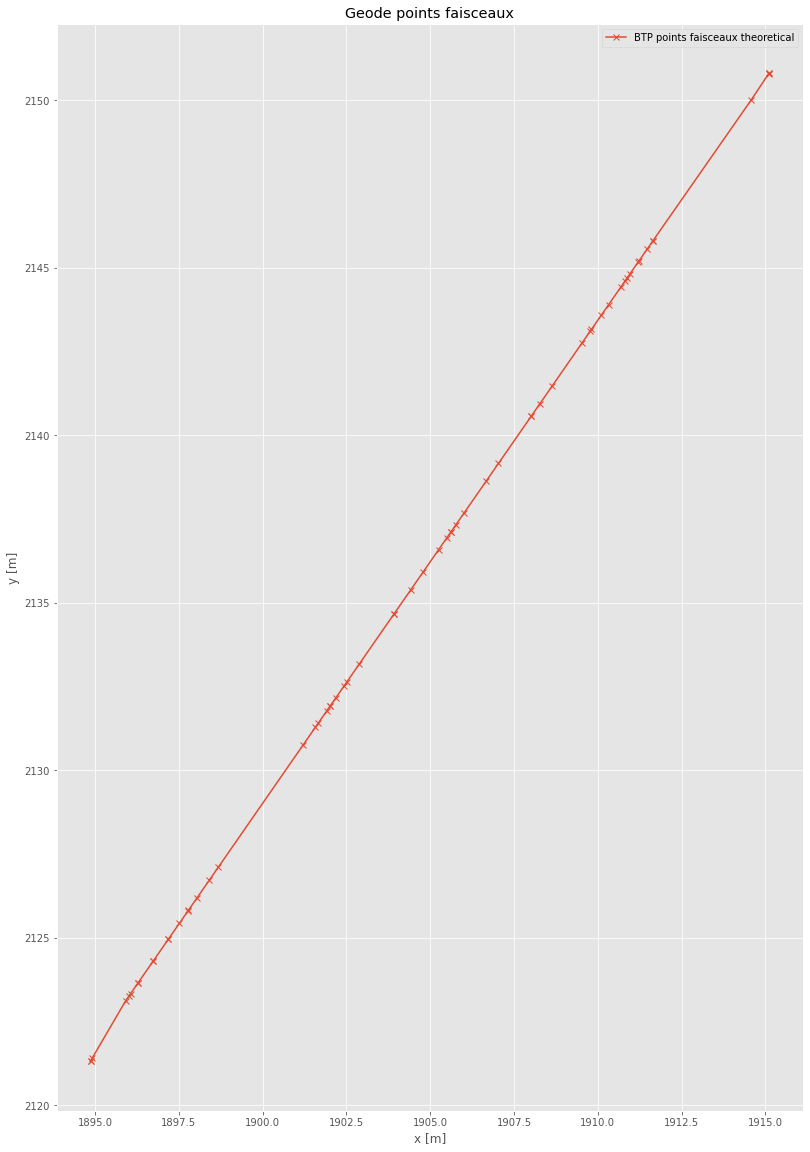

In [50]:
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Geode points faisceaux")

ax.plot(btp_merged["X (m)"], btp_merged["Y (m)"], marker="x", label = "BTP points faisceaux theoretical")

ax.set_aspect('equal')
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.legend()

## Let's verify if I find the same angle for SMH.42

In [100]:
btp_merged.iloc[58:60]

Elément       X (m)       Y (m)    Z (m) Longueur (m)  \
58  SMH.42.E  1914.57557  2149.99477  2433.66            -   
59  SMH.42.S  1915.09793  2150.77853  2433.66      0.94200   

    Tilt faisceau (rad)  1/2 Déflexion (rad)  Gisement (gon)  \
58                  0.0                  0.0       39.176103   
59                  0.0                  0.0       35.674694   

    Pente faisceau (rad)  Valeur R (m)  Valeur V (m)  Valeur T (rad)  \
58                   0.0           NaN           NaN             NaN   
59                   0.0           NaN           NaN             NaN   

    Valeur L (m)  Gisement (rad)  
58           NaN        0.615377  
59           NaN        0.560377

In [98]:
x1 = btp_merged.iloc[58]["X (m)"]
y1 = btp_merged.iloc[58]["Y (m)"]

x2 = btp_merged.iloc[59]["X (m)"]
y2 = btp_merged.iloc[59]["Y (m)"]

In [99]:
theta = np.pi/2 - np.arctan( (y2-y1)/(x2-x1) )
theta

0.5878730393549155

In [94]:
btp_merged.iloc[12:14]

Elément       X (m)       Y (m)    Z (m) Longueur (m)  \
12  DHZ.10.E  1897.51466  2125.42854  2433.66            -   
13  DHZ.10.S  1897.76320  2125.78677  2433.66      0.43600   

    Tilt faisceau (rad)  1/2 Déflexion (rad)  Gisement (gon)  \
12                  0.0                  0.0       38.614852   
13                  0.0                  0.0       38.614852   

    Pente faisceau (rad)  Valeur R (m)  Valeur V (m)  Valeur T (rad)  \
12                   0.0           NaN           NaN             NaN   
13                   0.0           NaN           NaN             NaN   

    Valeur L (m)  Gisement (rad)  
12           NaN        0.606561  
13           NaN        0.606561

In [95]:
x1 = btp_merged.iloc[12]["X (m)"]
y1 = btp_merged.iloc[12]["Y (m)"]

x2 = btp_merged.iloc[13]["X (m)"]
y2 = btp_merged.iloc[13]["Y (m)"]

In [96]:
theta = np.pi/2 - np.arctan( (y2-y1)/(x2-x1) )
theta

0.6065528082039358